In [1]:
import optuna
from optuna.visualization import plot_optimization_history
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns


sns.set_theme()
rcParams['figure.figsize'] = 20, 6

In [11]:
study = optuna.load_study(study_name='ppo', storage="sqlite:///studies/z0.db")
df = study.trials_dataframe()
df.loc[:, 'duration_int'] = df.duration.astype('int64')
df

,number,value,datetime_start,datetime_complete,duration,params_activation_fn,params_batch_size,params_clip_range,params_ent_coef,params_gae_lambda,params_gamma,params_learning_rate,params_lr_schedule,params_max_grad_norm,params_n_epochs,params_n_steps,params_ortho_init,params_vf_coef,state,duration_int
0,0,-1.000000,2022-12-10 02:36:45.358435,2022-12-10 02:56:45.539865,0 days 00:20:00.181430,relu,128,0.3,1.802955e-08,0.99,0.9990,0.000010,constant,0.3,10,64,True,0.132850,COMPLETE,1200181430000
1,1,-1.000000,2022-12-10 02:56:45.698649,2022-12-10 03:19:24.754507,0 days 00:22:39.055858,leaky_relu,128,0.1,4.979379e-02,0.90,0.9999,0.005084,constant,0.6,20,32,False,0.834779,COMPLETE,1359055858000
2,2,-1.000000,2022-12-10 03:19:24.903501,2022-12-10 03:38:40.826221,0 days 00:19:15.922720,tanh,256,0.4,1.266721e-02,0.95,0.9500,0.590092,constant,0.8,5,2048,True,0.559427,COMPLETE,1155922720000
3,3,-1.000000,2022-12-10 03:38:40.979428,2022-12-10 03:58:47.952598,0 days 00:20:06.973170,elu,256,0.2,2.017828e-05,0.80,0.9800,0.000188,linear,0.8,10,2048,True,0.158336,COMPLETE,1206973170000
4,4,-1.000000,2022-12-10 03:58:48.106619,2022-12-10 04:19:56.000612,0 days 00:21:07.893993,elu,128,0.2,4.865538e-03,0.80,0.9500,0.000015,constant,0.8,10,4096,True,0.704179,COMPLETE,1267893993000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,-0.583333,2022-12-11 13:48:11.435665,2022-12-11 14:08:22.484680,0 days 00:20:11.049015,leaky_relu,512,0.1,3.070402e-07,0.99,0.9900,0.000041,constant,0.3,20,128,False,0.365926,COMPLETE,1211049015000
96,96,0.062500,2022-12-11 14:08:22.632682,2022-12-11 14:28:40.336682,0 days 00:20:17.704000,leaky_relu,512,0.1,1.927717e-07,0.99,0.9900,0.000257,constant,0.6,20,128,False,0.308513,COMPLETE,1217704000000
97,97,-1.000000,2022-12-11 14:28:40.487682,2022-12-11 14:48:41.118999,0 days 00:20:00.631317,relu,512,0.4,1.195931e-06,0.92,0.9500,0.000021,constant,0.3,20,512,True,0.456127,COMPLETE,1200631317000
98,98,0.250000,2022-12-11 14:48:41.286999,2022-12-11 15:08:55.079784,0 days 00:20:13.792785,leaky_relu,512,0.1,4.287088e-07,0.99,0.9900,0.000174,constant,0.3,20,128,False,0.324570,COMPLETE,1213792785000


In [8]:
plot_optimization_history(study)

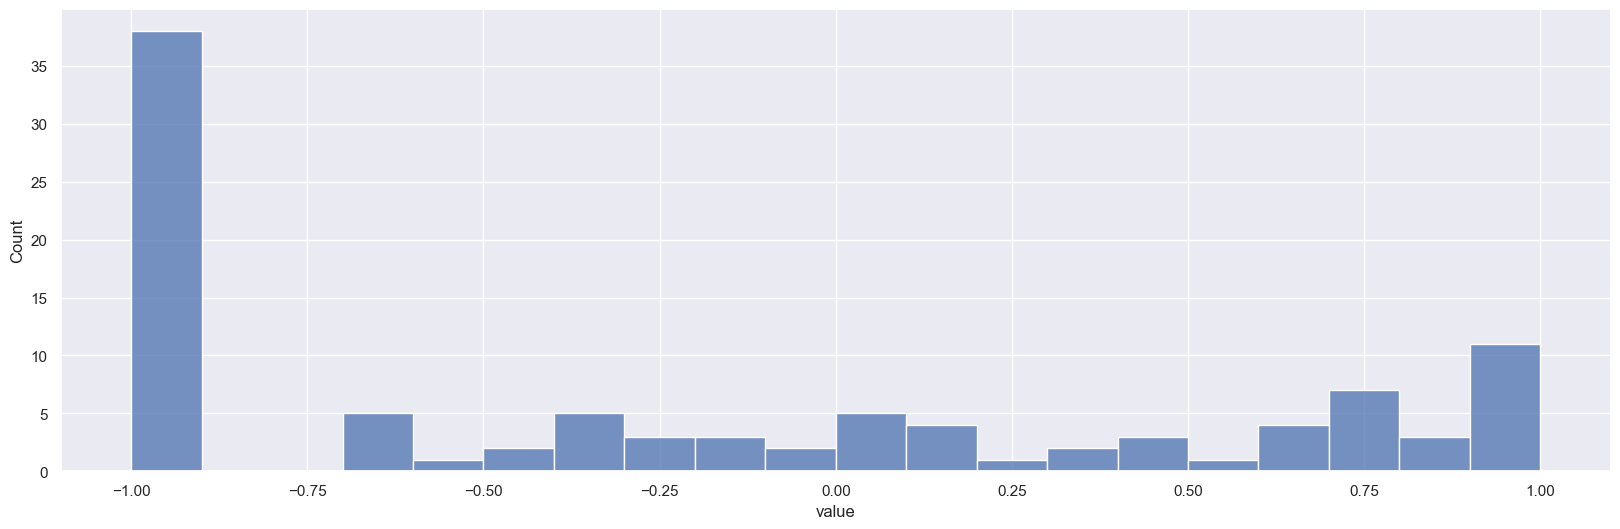

In [13]:
sns.histplot(df.value, bins=20)
plt.show()

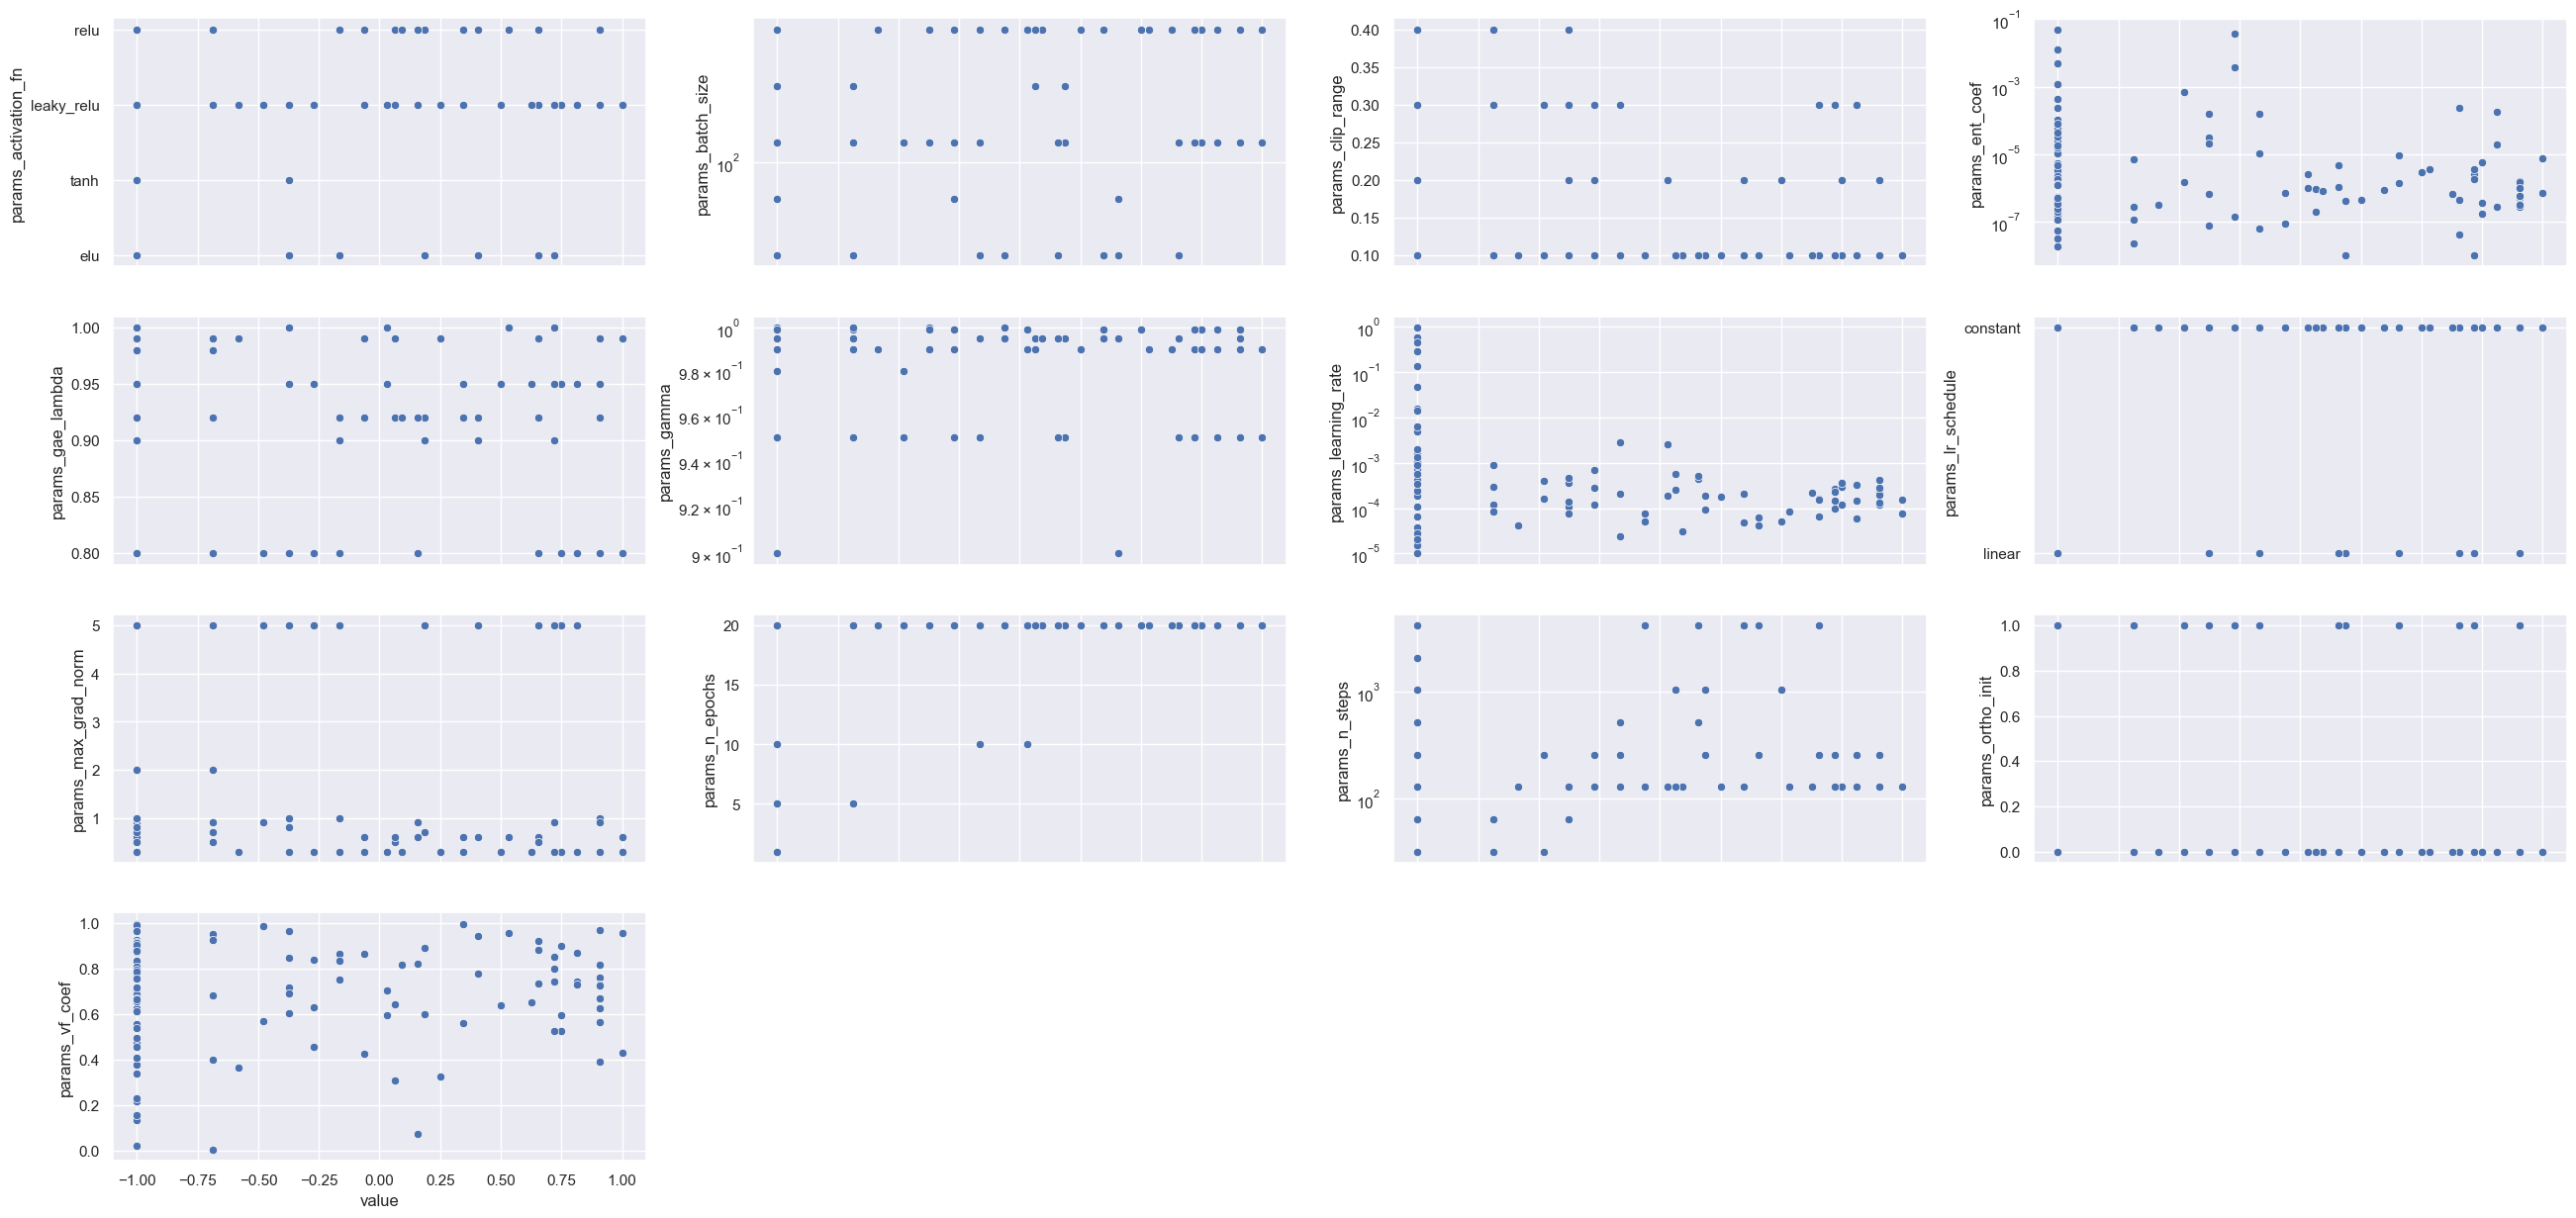

In [14]:
params_cols = df.columns[df.columns.str.startswith('params_')]

log_cols = ['n_steps', 'batch_size', 'gamma', 'learning_rate', 'ent_coef']
log_cols = ['params_' + x for x in log_cols]


fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, figsize=(32, 15))
axes = axes.flatten()

for i, param_col in enumerate(params_cols):
    plot = sns.scatterplot(df, y=param_col, x='value', ax=axes[i])
    if param_col in log_cols:
        plot.set(yscale='log')
for i in range(len(params_cols), axes.shape[0]):
    axes[i].axis('off')
plt.show()

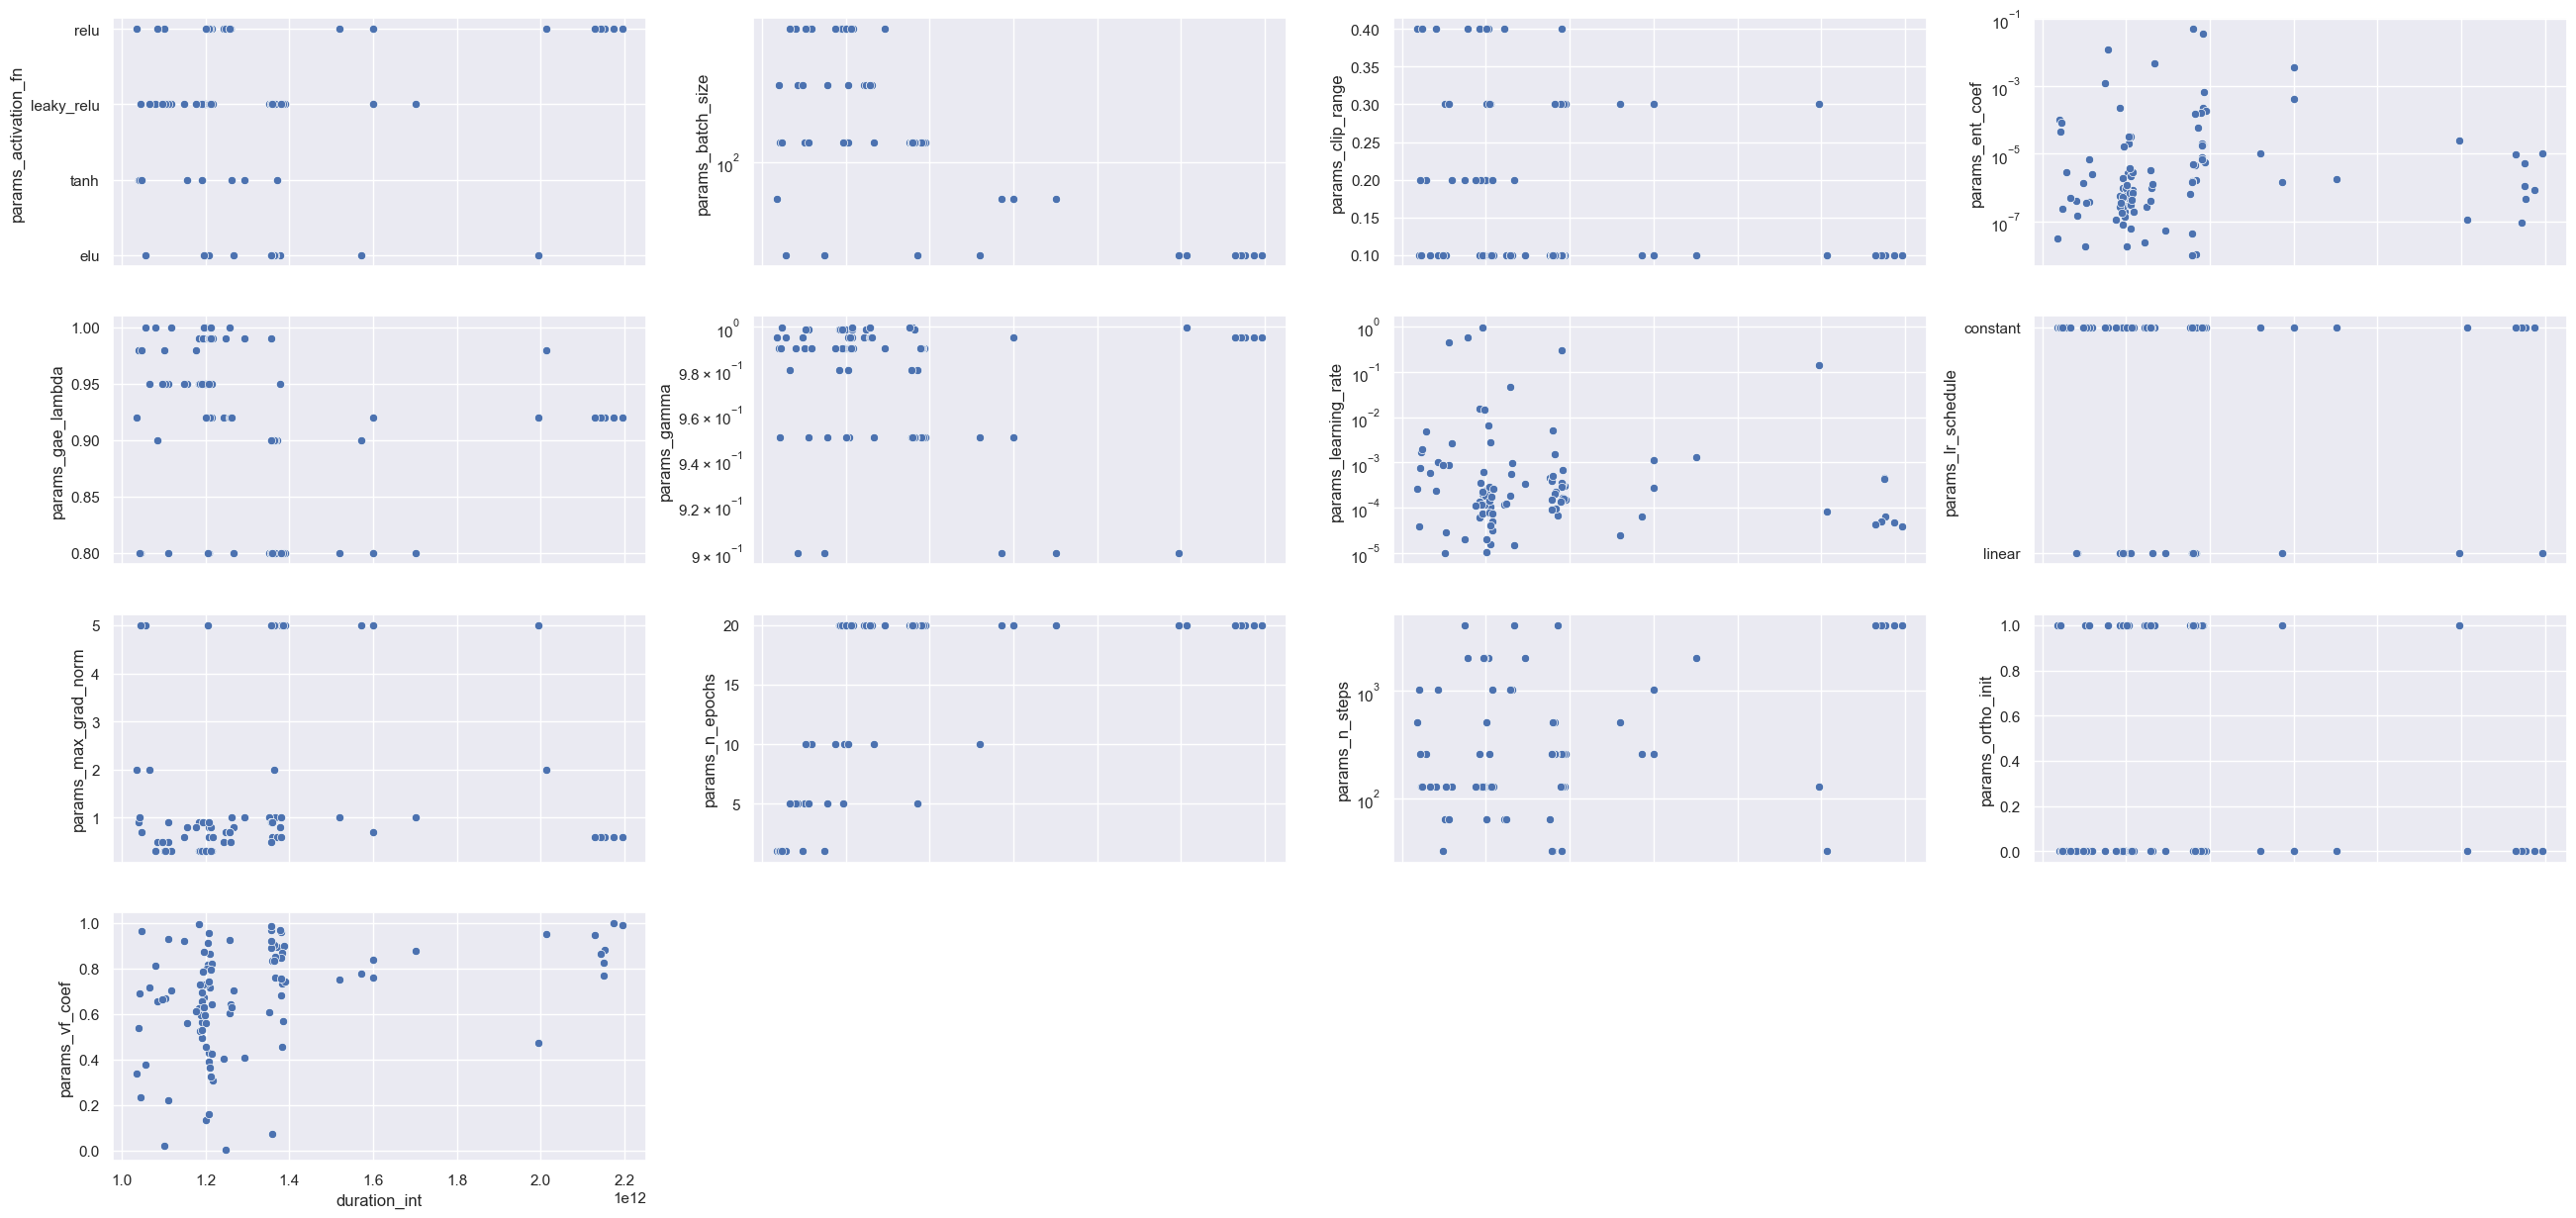

In [18]:
params_cols = df.columns[df.columns.str.startswith('params_')]

log_cols = ['n_steps', 'batch_size', 'gamma', 'learning_rate', 'ent_coef']
log_cols = ['params_' + x for x in log_cols]

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, figsize=(32, 15))
axes = axes.flatten()

for i, param_col in enumerate(params_cols):
    plot = sns.scatterplot(df, y=param_col, x='duration_int', ax=axes[i])
    if param_col in log_cols:
        plot.set(yscale='log')
for i in range(len(params_cols), axes.shape[0]):
    axes[i].axis('off')
plt.show()